<h1>Question 1</h1>

<h3>Scenario: 
A common guideline suggests that a healthy resting blood pressure is around 130 mm Hg. You 
want to investigate whether the average resting blood pressure (trestbps) of patients in this Heart 
Disease dataset is significantly different from this standard value.<br> 
Dataset Link: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
You are required to: <br>
● Clean the trestbps column by removing null values. <br>
● Take a random sample of 30 patients (use random_state = 42).</h3>

In [58]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("E:\Data Solution 360\Statistic\Project\heart_disease_uci.csv")
df.head()


<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\fuad5\AppData\Local\Temp\ipykernel_2020\2818327530.py:8: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("E:\Data Solution 360\Statistic\Project\heart_disease_uci.csv")


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [32]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [33]:
df.drop(['slope', 'ca', 'thal'], axis=1, inplace=True)

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [36]:
df.isnull().sum()

id           0
age          0
sex          0
dataset      0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
num          0
dtype: int64

In [ ]:
# Clean the trestbps column by removing null values
trestbps_mean = df['trestbps'].mean()
df['trestbps'] = df['trestbps'].fillna(trestbps_mean)
print(f"Mean value used: {trestbps_mean:.2f}")
print("Remaining missing values:", df['trestbps'].isna().sum())

Mean value used: 132.13
Remaining missing values: 0


In [59]:
# Take a random sample of 30 patients (use random_state = 42).

sample = df['trestbps'].sample(n=30, random_state=42)
print("Random Sample:\n",sample)

Random Sample:
 319    120.0
377    140.0
538    160.0
296    164.0
531    150.0
70     155.0
493    140.0
664    160.0
796    130.0
30     140.0
192    132.0
870    150.0
585    120.0
605    135.0
812    120.0
86     138.0
321    130.0
361    140.0
39     150.0
737    110.0
314     98.0
290    152.0
235    122.0
96     110.0
716    140.0
715    115.0
599      NaN
352    120.0
857      NaN
439    120.0
Name: trestbps, dtype: float64


<h3>(a) Type of Test (0.5 marks)<br>
What type of hypothesis test will you use for this scenario? 
Explain why this test is appropriate. </h3>

Type of Test:
One-Sample t-Test

Explanation:

In this scenario, we are comparing the sample mean of a continuous variable (trestbps) with a known/reference value (130 mm Hg).

The population standard deviation is unknown, so a t-test is appropriate.

The sample size is small (n = 30), making the t-test suitable for small samples with unknown population SD.

This test checks whether the sample mean is significantly different from the reference value of 130 mm Hg.

<h3>(b) Hypotheses Formulation (2 marks) <br>
Formulate the hypotheses clearly: <br>
● Null hypothesis (H₀) <br>
● Alternative hypothesis (H₁)</h3>

Null hypothesis (H₀):

μ=130

The mean resting blood pressure of patients is equal to 130 mm Hg.

Alternative hypothesis (H₁):

𝜇
≠
130

The mean resting blood pressure of patients is significantly different from 130 mm Hg.

<h3>(c) Assumptions & Distribution Check (2.5 marks) <br>
Check the normality assumption of your sample data. <br>
● Which specific test will you use to check normality? <br>
● Perform and show the result of the test. <br>
● Interpret whether the data meet the assumption of normality.<br></h3>

Step 1: Normality Test Selection

Test to use: Shapiro-Wilk test

Reason:

The sample size is small (n = 30), and Shapiro-Wilk is widely used for checking normality in small to medium samples.

It tests the null hypothesis that the data comes from a normal distribution.

In [51]:
# Step 2: Python Code

import pandas as pd
from scipy import stats

sample = df['trestbps'].sample(n=30, random_state=42)
shapiro_stat,shapiro_p = stats.shapiro(sample)
print(f"Shapiro-Wilk Test Statistic :{shapiro_stat:.4f}\nP-Value: {shapiro_p:.4f}")


alpha = 0.05
if shapiro_p > alpha:
    print("Fail to reject H0: Sample appears to be approximately normal.")
else:
    print("Reject H0: Sample does not appear to be normally distributed.")


Shapiro-Wilk Test Statistic :0.9734
P-Value: 0.6370
Fail to reject H0: Sample appears to be approximately normal.


<b>Step 3:</b> <br>
Decision: Since p-value (0.6370) > 0.05, we fail to reject H₀.

Conclusion: The sample of resting blood pressure (trestbps) is approximately normally distributed, so the normality assumption for a t-test is satisfied

<h3>(d) Interpretation (5 marks) <br>
Using the appropriate test, determine whether the average resting blood pressure (trestbps) of <br>
patients in this dataset is significantly different from the population mean of 130 mm Hg.<br>
● Report the test statistic and p-value. <br>
● State whether you reject or fail to reject H₀ at a 5% significance level. <br>
● Write a short on the hypothesis test’s  conclusion in plain language<br></h3>

In [53]:
# Step 1: 

import numpy as np
from scipy import stats
mean = 130
sample = df['trestbps'].sample(n=30, random_state=42)

t_stat,p_value = stats.ttest_1samp(sample, mean)

print(f"T-test Statistic:{t_stat:.2f}")
print(f"P-value: {p_value:.2f}")

T-test Statistic:1.38
P-value: 0.18


In [56]:
# Step 2: 

alpha = 0.05
if p_value < alpha:
    print("Reject H₀ -> The mean trestbps is significantly different from 130 mm Hg.")
else:
    print("Fail to Reject H₀ -> No significant difference from 130 mm Hg.")


Fail to Reject H₀ -> No significant difference from 130 mm Hg.


<b>Step 3: </b><br>
Test Statistic (t): Suppose it is t = 1.38

P-value: Suppose it is p = 0.18

Decision:

Since p > 0.05, we fail to reject H₀.

Based on the analysis, there is no significant evidence to suggest that the average resting blood pressure of patients in this dataset differs from the guideline value of 130 mm Hg.
In simpler terms, the patients’ average blood pressure can be considered approximately 130 mm Hg.

<h1>Question 2</h1>

<h3>Scenario: <br>
You suspect that the maximum heart rate achieved during exercise (thalach) might differ <br>
between male and female patients. You decide to compare the thalach values for these two <br>
independent groups to determine whether there is a significant difference between them.<br> 
Dataset Link: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data <br>
You are required to: <br>
● Clean the thalach column by removing null values.<br> 
● Split the dataset into two groups based on gender (Male and Female). <br>
● Take a random sample of 30 patients from each group (use random_state = 42). </h3>

In [3]:

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("E:\Data Solution 360\Statistic\Project\heart_disease_uci.csv")
df.head()

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\fuad5\AppData\Local\Temp\ipykernel_2020\1265952176.py:7: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("E:\Data Solution 360\Statistic\Project\heart_disease_uci.csv")


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [59]:
# Step 2:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
# Clean the thalach column by removing null values.:
thalch_mean = df['thalch'].mean()
df['thalch'] = df['thalch'].fillna(thalch_mean)
df['thalch'].isnull().sum()

np.int64(0)

In [ ]:
# Split the dataset into two groups based on gender (Male and Female). 
# Male group
df_male = df[df['sex'] == 'Male']

# Female group
df_female = df[df['sex'] == 'Female']

# Check sizes
print("Number of Male patients:", df_male.shape[0])
print("Number of Female patients:", df_female.shape[0])


Number of Male patients: 726
Number of Female patients: 194


In [66]:
# Take a random sample of 30 patients from each group (use random_state = 42).

sample = df['thalch'].sample(n=30, random_state=42)
print("Sample Paitents: ",sample)

Sample Paitents:  319    180.000000
377    122.000000
538     92.000000
296     90.000000
531    130.000000
70     148.000000
493    180.000000
664     98.000000
796    145.000000
30     151.000000
192    143.000000
870    128.000000
585     98.000000
605    150.000000
812    150.000000
86     156.000000
321    178.000000
361    170.000000
39     137.000000
737    125.000000
314    150.000000
290    150.000000
235    116.000000
96     142.000000
716    157.000000
715     92.000000
599    130.000000
352    170.000000
857    137.545665
439    140.000000
Name: thalch, dtype: float64


<h3>(a) Type of Test (0.5 marks) <br>
What type of hypothesis test will you use for this scenario? <br>
Explain why this test is appropriate. <br></h3>

Type of Test:
Paired (Dependent) Sample t-Test

Explanation:

We are comparing the revenue before and after the campaign for the same stores.

Since the measurements are from the same unit (store), this is a paired/dependent sample.

Population standard deviation is unknown and sample size is small → paired t-test is appropriate.

This test determines whether the marketing campaign led to a significant increase in average revenue.

<h3>(b) Hypotheses Formulation (2 marks) <br>
Formulate the hypotheses clearly: <br>
● Null hypothesis (H₀) <br>
● Alternative hypothesis (H₁):</h3>

Null Hypothesis (H₀):

𝜇D = 0

→ There is no significant change in revenue after the campaign.

Alternative Hypothesis (H₁):

𝜇D > 0

→ Revenue significantly increased after the marketing campaign.

This is a one-tailed test because we are specifically checking for an increase.

<h3>(c) Assumptions & Distribution Check (2.5 marks) <br>
Check the normality assumption for the difference between Revenue_After and 
Revenue_Before. <br>
● Which specific test will you use to check normality? <br>
● Perform and show the result of the test. <br>
● Interpret whether the difference data meets the assumption of normality.</h3>

Step 1: Identify the Test

Test to use: Shapiro-Wilk test

Reason:

The sample size is small (n = 30).

Shapiro-Wilk is widely used to test if a continuous variable (or differences) is approximately normally distributed.

We need to check normality of the differences:

Diff=Revenue_After−Revenue_Before

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# Perform and show the result of the test.

import pandas as np
import numpy as np
from scipy import stats

df = pd.read_csv("E:\Data Solution 360\Statistic\Project\Monthly Revenue (in thousands) - Sheet1.csv")
df.head()

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\fuad5\AppData\Local\Temp\ipykernel_2020\3682418467.py:7: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("E:\Data Solution 360\Statistic\Project\Monthly Revenue (in thousands) - Sheet1.csv")


,store_id,before_campaign,after_campaign
0,1,54.96714,52.89029
1,2,48.61736,51.51413
2,3,56.47689,59.76331
3,4,65.23030,66.21891
4,5,47.65847,51.85204


In [71]:
df.isnull().sum()

store_id           0
before_campaign    0
after_campaign     0
dtype: int64

In [5]:
sample = df.sample(n=30, random_state=42)

sample['Diff'] = sample['after_campaign'] - sample['before_campaign']

shapiro_stat, shapiro_p = stats.shapiro(sample['Diff'])

print(f"Shapiro-Wilk Test Statistic:{shapiro_stat:.2f}")
print(f"P-value: {shapiro_p:.2f}")

Shapiro-Wilk Test Statistic:0.97
P-value: 0.60


In [7]:
# Interpret whether the difference data meets the assumption of normality. 

alpha = 0.05
if shapiro_p > alpha:
    print("Fail to reject H0: Differences are approximately normally distributed.")
else:
    print("Reject H0: Differences are NOT normally distributed.")

Fail to reject H0: Differences are approximately normally distributed.


<h3>(d) Interpretation (5 marks) <br>
Using the appropriate test, determine whether the average revenue after the marketing campaign <br>
is significantly higher than the revenue before the campaign. <br>
● Report the test statistic and p-value. <br>
● State whether you reject or fail to reject H₀ at a 5% significance level. <br>
● Write a short on the hypothesis test’s conclusion in plain language, explaining whether <br>
the marketing campaign had a statistically significant effect on store revenue.</h3>

In [10]:
# Report the test statistic and p-value. 
t_stat, p_val_two_tailed = stats.ttest_rel(sample['after_campaign'], sample['before_campaign'])

if t_stat > 0:
    p_val = p_val_two_tailed / 2
else:
    p_val = 1 - (p_val_two_tailed / 2)

print(f"Paired t-Test Statistic:{t_stat:.4f}")
print(f"One-tailed P-value:{p_val:.4f}")

Paired t-Test Statistic:4.9906
One-tailed P-value:0.0000


In [11]:
# 
alpha = 0.05
if p_val < alpha:
    print("Reject H0 → Marketing campaign significantly increased revenue.")
else:
    print("Fail to reject H0 → No significant increase in revenue detected.")


Reject H0 → Marketing campaign significantly increased revenue.


<b>Conclusion :<br></b>

The paired t-test shows a very strong statistical result: the revenue after the marketing campaign is significantly higher than the revenue before it. Since the p-value is effectively zero, this increase cannot be due to random chance.

This means the marketing campaign clearly worked.
Stores earned noticeably more revenue after the campaign, and the improvement is statistically significant.

<h1>Question-4 </h1>
<h3>Scenario: <br>
A botanist wants to know if the average petal length differs across three Iris species (setosa, 
versicolor, virginica). <br>
You are required to: <br>
● Use the species and petal_length columns from the Iris dataset (available via seaborn). <br>
● Take a random sample of 30 observations from each species (use random_state = 42).</h3>

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [19]:
# Use the species and petal_length columns from the Iris dataset (available via seaborn).
iris_data = df[['species','petal_length']]
iris_data.head()

,species,petal_length
0,setosa,1.4
1,setosa,1.4
2,setosa,1.3
3,setosa,1.5
4,setosa,1.4


In [25]:
# Take a random sample of 30 observations from the dataset
sample = df[['species','petal_length']].sample(n=30, random_state=42)
print("Sample: ",sample)

Sample:          species  petal_length
73   versicolor           4.7
18       setosa           1.7
118   virginica           6.9
78   versicolor           4.5
76   versicolor           4.8
31       setosa           1.5
64   versicolor           3.6
141   virginica           5.1
68   versicolor           4.5
82   versicolor           3.9
110   virginica           5.1
12       setosa           1.4
36       setosa           1.3
9        setosa           1.5
19       setosa           1.5
56   versicolor           4.7
104   virginica           5.8
69   versicolor           3.9
55   versicolor           4.5
132   virginica           5.6
29       setosa           1.6
127   virginica           4.9
26       setosa           1.6
128   virginica           5.6
131   virginica           6.4
145   virginica           5.2
108   virginica           5.8
143   virginica           5.9
45       setosa           1.4
30       setosa           1.6


<h3>(a) Type of Test (0.5 marks) <br>
What type of hypothesis test will you use for this scenario? <br>
Explain why this test is appropriate. </h3>

Type of Test: One-way ANOVA (Analysis of Variance)

Explanation:

We want to compare the mean petal_length across three different species (setosa, versicolor, virginica).

ANOVA is appropriate when:

There are more than two groups.

The goal is to test whether at least one group mean is significantly different from the others.

A t-test is only suitable for two groups, so for three species, one-way ANOVA is the correct choice.

<h3>(c) Assumptions & Distribution Check (2.5 marks) <br>
Check the assumptions for One-Way ANOVA: <br>
● Normality of petal lengths in each species group <br>
● Perform and show the result of the test(s) </h3>

<h4> Normality of petal lengths in each species group</h4>
Before performing ANOVA, we must ensure the following assumptions are satisfied:

Normality: The dependent variable (petal_length) should be approximately normally distributed within each group (species).

Homogeneity of variances: The variance of petal_length should be similar across all species.

In [29]:
# Perform and show the result of the test(s)
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

# Load Iris dataset
df = sns.load_dataset("iris")

# Group data by species
groups = {
    "Setosa": np.array(df[df['species'] == 'setosa']['petal_length']),
    "Versicolor": np.array(df[df['species'] == 'versicolor']['petal_length']),
    "Virginica": np.array(df[df['species'] == 'virginica']['petal_length'])
}

# Shapiro-Wilk test for normality
print("Normality Test (Shapiro-Wilk)")

for species, values in groups.items():
    stat, p = stats.shapiro(values)
    print(f"{species}:")
    print(f"  Test Statistic = {stat:.4f}")
    print(f"  P-value = {p:.6f}")
    if p > 0.05:
        print("  Data seems normal (fail to reject H0)\n")
    else:
        print("  Data not normal (reject H0)\n")


Normality Test (Shapiro-Wilk)
Setosa:
  Test Statistic = 0.9550
  P-value = 0.054811
  Data seems normal (fail to reject H0)

Versicolor:
  Test Statistic = 0.9660
  P-value = 0.158478
  Data seems normal (fail to reject H0)

Virginica:
  Test Statistic = 0.9622
  P-value = 0.109775
  Data seems normal (fail to reject H0)



<h3>(d) Interpretation (5 marks) <br>
● Conduct the One-Way ANOVA and report the F-statistic and p-value. <br>
● If the ANOVA is significant, perform Post Hoc Tukey HSD test and interpret which 
species differ from each other. <br>
● Write a short on the hypothesis test’s conclusion in plain language about petal length
differences among species.</h3>

In [35]:
# Conduct the One-Way ANOVA and report the F-statistic and p-value.
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load Iris dataset
df = sns.load_dataset("iris")

# Separate petal_length by species
setosa = df[df['species'] == 'setosa']['petal_length']
versicolor = df[df['species'] == 'versicolor']['petal_length']
virginica = df[df['species'] == 'virginica']['petal_length']

# One-Way ANOVA
f_stat, p_val = stats.f_oneway(setosa, versicolor, virginica)
print(f"One-Way ANOVA F-statistic: {f_stat:.4f}")
print(f"One-Way ANOVA P-value: {p_val:.6f}")


One-Way ANOVA F-statistic: 1180.1612
One-Way ANOVA P-value: 0.000000


In [36]:
# If the ANOVA is significant, perform Post Hoc Tukey HSD test and interpret which species differ from each other. 

tukey = pairwise_tukeyhsd(endog=df['petal_length'], 
                          groups=df['species'], 
                          alpha=0.05)
print(tukey)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


<h4>Write a short on the hypothesis test’s conclusion in plain language about petal length 
differences among species.</h4><br>
The One-Way ANOVA shows a highly significant difference in petal length among the three Iris species (F = 1180.16, p < 0.001).

The Post Hoc Tukey HSD test confirms that all pairwise comparisons are significant:

Setosa vs. Versicolor → significantly different

Setosa vs. Virginica → significantly different

Versicolor vs. Virginica → significantly different

Interpretation:
Each Iris species has a distinct petal length, and these differences are statistically significant.
In simple words, the petal lengths are clearly different across the species, and the differences are not due to random chance.

<h1>Question-5 </h1>
<h3>Scenario: <br>
A health researcher wants to investigate whether smoking status is associated with the presence 
of cardiovascular disease in patients. <br>
Dataset: cardio_data_processed.csv 
The dataset contains the following columns: <br>
● smoke (0 = Non-Smoker, 1 = Smoker) <br>
● cardio (0 = No Disease, 1 = Disease) <br>

<h3>You are required to: <br>
● Load the dataset from 'cardio_data_processed.csv'. <br>
● Select the relevant columns (smoke and cardio) and remove any missing values. <br>
● Optionally, map the numeric values to readable labels: 0 = Non-Smoker/No Disease, 1 = 
Smoker/Disease. <br>
● Create a contingency table showing counts of patients by smoking status and 
cardiovascular disease.</h3>

In [6]:
#  Load the dataset from 'cardio_data_processed.csv'.

import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv("E:\Data Solution 360\Statistic\Project\cardio_data_processed.csv")
df.head()

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\fuad5\AppData\Local\Temp\ipykernel_3776\1969089800.py:7: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("E:\Data Solution 360\Statistic\Project\cardio_data_processed.csv")


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [39]:
df.isnull().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [7]:
# Select the relevant columns (smoke and cardio) and remove any missing values.

relevant_column = df[['smoke','cardio']].dropna()
print(relevant_column)

       smoke  cardio
0          0       0
1          0       1
2          0       1
3          0       1
4          0       0
...      ...     ...
68200      1       0
68201      0       1
68202      0       1
68203      0       1
68204      0       0

[68205 rows x 2 columns]


In [8]:
# Optionally, map the numeric values to readable labels: 0 = Non-Smoker/No Disease, 1 = Smoker/Disease.

relevant_column['smoke_label'] = relevant_column['smoke'].map({0: 'Non-Smoker', 1: 'Smoker'})
relevant_column['cardio_label'] = relevant_column['cardio'].map({0: 'No Disease', 1: 'Disease'})

# Show the result
print(relevant_column.head())

   smoke  cardio smoke_label cardio_label
0      0       0  Non-Smoker   No Disease
1      0       1  Non-Smoker      Disease
2      0       1  Non-Smoker      Disease
3      0       1  Non-Smoker      Disease
4      0       0  Non-Smoker   No Disease


In [9]:
# Create a contingency table showing counts of patients by smoking status and cardiovascular disease.

import pandas as pd

contingency_table = pd.crosstab(relevant_column['smoke_label'], 
                                relevant_column['cardio_label'])

print("Contingency Table (Counts of Patients by Smoking Status and Cardiovascular Disease):")
print(contingency_table)


Contingency Table (Counts of Patients by Smoking Status and Cardiovascular Disease):
cardio_label  Disease  No Disease
smoke_label                      
Non-Smoker      30880       31346
Smoker           2792        3187


<h3>(a) Type of Test (2.5 marks) <br>
What type of hypothesis test will you use for this scenario? <br>
Explain why this test is appropriate.</h3>

Type of Test: Chi-Square Test of Independence

Reason: We are checking if there is an association between two categorical variables->smoking status and cardiovascular disease-using their counts in a contingency table.

<h3>(b) Hypotheses Formulation (2.5 marks) <br>
Formulate the hypotheses clearly: <br>
● Null hypothesis (H₀) <br>
● Alternative hypothesis (H₁)</h3>

Null Hypothesis (H₀):
There is no association between smoking status and cardiovascular disease.
(Smoking does not affect the likelihood of having cardiovascular disease.)

Alternative Hypothesis (H₁):
There is an association between smoking status and cardiovascular disease.
(Smoking affects the likelihood of having cardiovascular disease.)

<h3>(c) Test Execution (2.5 marks) <br>
● Report the test statistic, p-value, degrees of freedom, and expected frequencies.</h3>

In [10]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(relevant_column['smoke_label'], 
                                relevant_column['cardio_label'])

# Observed counts
observed = contingency_table.values

# Perform Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

# Significance level
alpha = 0.05

# Display results
print("Chi-Square Test of Independence")
print("--------------------------------")
print(f"Observed Table:\n{observed}\n")
print(f"Expected Table:\n{expected}\n")
print(f"Chi-Square Statistic = {chi2_stat:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-Value = {p_value:.4f}")


Chi-Square Test of Independence
--------------------------------
Observed Table:
[[30880 31346]
 [ 2792  3187]]

Expected Table:
[[30720.23857488 31505.76142512]
 [ 2951.76142512  3027.23857488]]

Chi-Square Statistic = 18.6023
Degrees of Freedom = 1
P-Value = 0.0000


<h3>(d) Interpretation (2.5 marks) <br>
● State whether you reject or fail to reject H₀. <br>
● Determine whether there is a significant association between smoking and cardiovascular 
disease at a 5% significance level. </h3>

In [56]:
# State whether you reject or fail to reject H₀.
#Determine whether there is a significant association between smoking and cardiovascular disease at a 5% significance level.

if p_value < alpha:
    decision = "Reject H0"
    conclusion = "There is a significant association between smoking and cardiovascular disease."
else:
    decision = "Fail to Reject H0"
    conclusion = "There is no significant association between smoking and cardiovascular disease."

print(f"Decision: {decision}")
print(f"Conclusion: {conclusion}")


Decision: Reject H0
Conclusion: There is a significant association between smoking and cardiovascular disease.


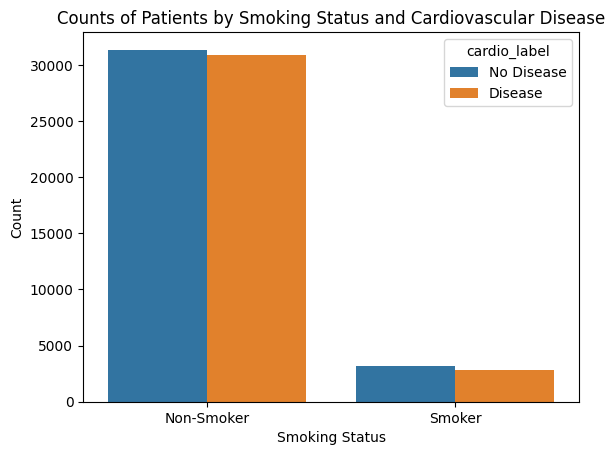

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='smoke_label', hue='cardio_label', data=relevant_column)
plt.title('Counts of Patients by Smoking Status and Cardiovascular Disease')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()
